In [307]:
 from Model import *
from DataLoader import *
from Setting import *

import collections
import os
import numpy as np
import pickle

## Week2Code1 TSP Problem

Introduce for TSP problem:https://en.wikipedia.org/wiki/Travelling_salesman_problem

Algorithm Video:https://www.coursera.org/learn/algorithms-npcomplete/lecture/jugfP/algorithmic-approaches-to-np-complete-problems

Implementation idea inspaired by https://www.coursera.org/learn/algorithms-npcomplete/discussions/weeks/2/threads/FNo8tpFPEeeH2hLapWklpg

In [308]:
class  all_pairs_shortest_path(Model):
    def __init__(self):
        super().__init__()

        
    def preprocess(self):
        self.data = self.dataLoader.data[1:]
        self.size = self.dataLoader.data[0]
        self.codedict = {}
    
        
    def model(self):
         pass
         
        


In [309]:
%%time
processLine = lambda x : [float(i.replace('\n','')) for i in x.split(' ')]
arg = {'fileName':'./data/tsptest1.txt','numLines':None ,  'processLine' : processLine  }

d = DataLoader(**arg)
m =  all_pairs_shortest_path()
s = Setting(d,m,False)
s.run()

Loading data ...
Total 26 lines read
--------------------------------------------------
result:None
Wall time: 0 ns


It is hard to compute the whole graph in one shot. The running time should be O(n2^n), which is really huge whan n is larger then 13. The idea is we divided the graph into two parts, computing the TSP separately, and combining the result.

## Plot the whole graph

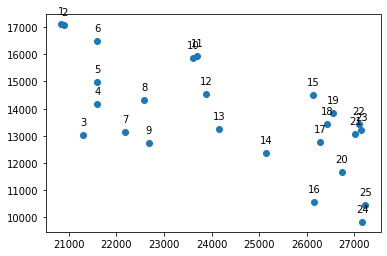

In [310]:

data = m.data
import numpy as np
import matplotlib.pyplot as plt

data = np.array(data)
plt.scatter(x = data[:,0], y = data[:,1])

for i,(x,y) in enumerate(zip(data[:,0],data[:,1])):

    label = "{:.2f}".format(y)

    plt.annotate(i+1, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


## Plot the left graph

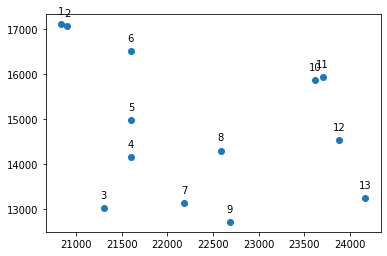

In [311]:
data = m.data[:13]
import numpy as np
import matplotlib.pyplot as plt

data = np.array(data)
plt.scatter(x = data[:,0], y = data[:,1])



for i,(x,y) in enumerate(zip(data[:,0],data[:,1])):

    label = "{:.2f}".format(y)

    plt.annotate(i+1, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


## Plot the right graph

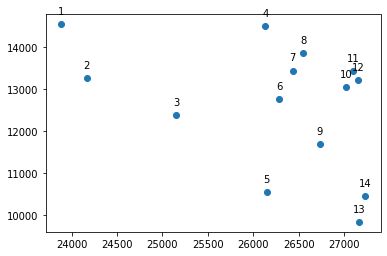

In [312]:
data = m.data[11:]
import numpy as np
import matplotlib.pyplot as plt

data = np.array(data)
plt.scatter(x = data[:,0], y = data[:,1])



for i,(x,y) in enumerate(zip(data[:,0],data[:,1])):

    label = "{:.2f}".format(y)

    plt.annotate(i+1, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


## Compute TSP on the left graph

In [319]:
from itertools import combinations 


# A Dynamic Programming Algorithm
data =  m.data[:13]
distancedict = dict()
for i in range(len(data)):
    for j in range(len(data)):
        distancedict[(i+1,j+1)] = ((data[i][0]-data[j][0])**2 + (data[i][1]-data[j][1])**2)**(1/2)


A = {}


n = len(data)

for size in range (1, n+ 1):
    for subset in combinations(range(2,n+1),size):
        subset = set(subset)
        subset.add(1)

        for j in subset:
            if j!= 1:
                minlist = []
                for k in subset - {j}:
#                     print(A)
#                     print(j,k)
#                     print('subset:',subset)
                    
                    # base case 1
                    if k == 1 and subset - {j} == {1}:
                        minlist.append(0 + distancedict[(k,j)])
                        continue
                    
                    # base case 2
                    if k == 1 and  subset - {j}!= {1}:
                        minlist.append(float('inf')  + distancedict[(k,j)])
                        continue
                        
                        
                    minlist.append(A[(tuple(sorted(list(subset - {j}))),k)] + distancedict[(k,j)])

                A[(tuple(sorted(list(subset))),j)] = min(minlist)

print(min([A[(tuple(range(1,n+1)),i)] + distancedict[(i,1)] for i in range(2,n+1)]))

14662.0046407879


## Compute TSP on the right graph

In [320]:
from itertools import combinations 


# A Dynamic Programming Algorithm
data =  m.data[11:]
distancedict = dict()
for i in range(len(data)):
    for j in range(len(data)):
        distancedict[(i+1,j+1)] = ((data[i][0]-data[j][0])**2 + (data[i][1]-data[j][1])**2)**(1/2)
distancedict

A = {}


n = len(data)

for size in range (1, n+ 1):

    for subset in combinations(range(2,n+1),size):

        subset = set(subset)
        subset.add(1)

        for j in subset:
            if j!= 1:
                minlist = []
                for k in subset - {j}:
#                     print(A)
#                     print(j,k)
#                     print('subset:',subset)
                    
                    # base case 1
                    if k == 1 and subset - {j} == {1}:
                        minlist.append(0 + distancedict[(k,j)])
                        continue
                    
                    # base case 2
                    if k == 1 and  subset - {j}!= {1}:
                        minlist.append(float('inf')  + distancedict[(k,j)])
                        continue
                        
                        
                    minlist.append(A[(tuple(sorted(list(subset - {j}))),k)] + distancedict[(k,j)])

                A[(tuple(sorted(list(subset))),j)] = min(minlist)

print(min([A[(tuple(range(1,n+1)),i)] + distancedict[(i,1)] for i in range(2,n+1)]))

14409.202165641733


## Compute the TSP on the whole graph by add left and right together and substract edge (12,13) twice!

In [322]:
data =  m.data
distancedict = dict()
for i in range(len(data)):
    for j in range(len(data)):
        distancedict[(i+1,j+1)] = ((data[i][0]-data[j][0])**2 + (data[i][1]-data[j][1])**2)**(1/2)
        
print('Final result:',14662.0046407879 + 14409.202165641733 - 2 * distancedict[(12,13)])

Final result: 26442.730308954753
